# Unsupervised Machine Learning

In the previous lesson we went over some important vocabulary for Machine Learning. We learned that for supervised learning your model will be trained on labeled data. In today's lesson we will be going over how to train a model with data that is not labeled, which we call Unsupervised Machine Learning.

## What is Unsupervised Machine Learning?

Unsupervised Machine Learning utilizes machine learning algorithims to label and analyze unlabeled datasets. There are 3 important ideas behind processing and preparing your data for Unsupervised ML. 

- Anomaly Detection
- Dimentionality Reduction
- Clustering

To further understand how these are incorperated into our data preprocessing steps let us use an example by loading in the iris dataset...

In [14]:
from sklearn.datasets import load_iris

# Load Iris Data
iris = load_iris()

You may notice this is the same dataset we used last time so you will have some familiarity working with it.

In [15]:
# This step is important so that we do not have the labels attached to the examples
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris_df
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now before we input our data into any model it is best to examine it and get a better understanding of what we are working with...

But before we can do that we will need to import some important packages that will allow for basic data analysis...

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Exploration

Now let's move on to some basic EDA that we learned in our Time Series Analysis lesson

In [17]:
#Use the `.info` and `.describe` methods
X.info()
X.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

Using the information gathered using the `.info` functionwe can drop any examples that have missing values.

In [18]:
X = X.dropna(inplace = True)

### Data Visualization

Now that our data has no missing values, we can move on to looking at potential features. Let's look at how each column and how they correlate to one another using the `.corr()` function, something we previously learned in correlation analysis.

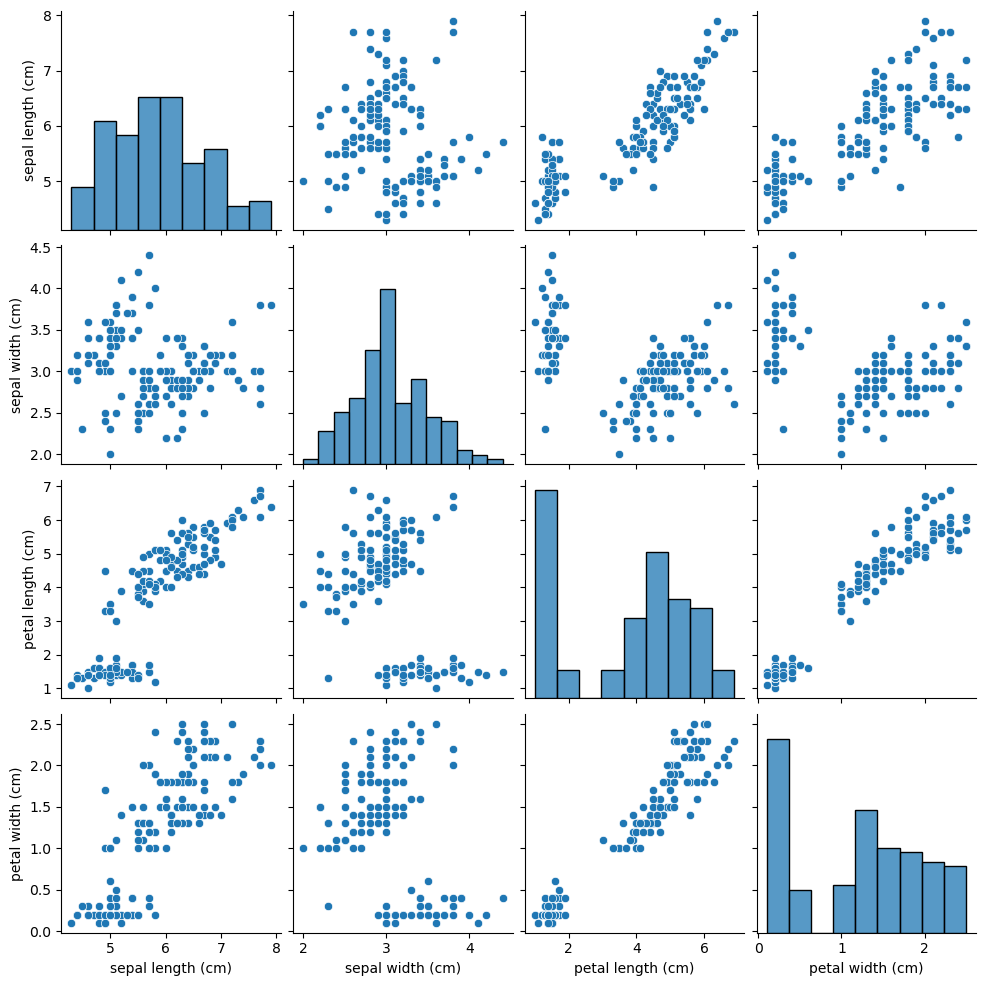

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df)
plt.show()

<span style = "background-color: yellow">
TODO: Examining the graph what patterns, trends or anything interesting happening. Think about what this may mean for identifying what species of iris flower it is. USe 2 minutes to write down any thoughts and then compare with a partner about your findings.
<span\>

Examining these pairplots above can provide us a lot of valuable information. Now we can take a pairplot and view them at a scatterplot and examine any trends and patterns that may arise from plotting these 2 inputs.

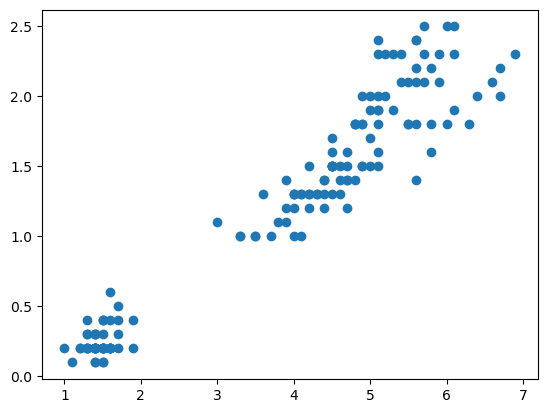

In [20]:
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'])

Using this new found insight the next step would be to develope some hypothesis. This is important as it will set us up for tuning our hyperparamaters for our unsupervised Ml model. The first thing we can hypothesize is how many potential groups or **clusters** can be made.

### What is Clustering and Why is it important?

Clustering is an important aspect of Unsupervised Machine Learning. This is because the predication you will be making is all about assumptions and what your model is being trained on. For instance, if a baby sees a dog for the first time and is told that it is a dog, that would be supervised learning. This is because that example of a dog was given the label *dog*. 

"Image of dog"

Now for instance another dog comes up to the baby. It may look very different however the baby can identify it as a dog using clues such as seeing that it has 4 legs, 2 pointy ears, and fur.

The baby is using previous features of the dog to identify this new animal. However, unlike the baby our model does not have eyes to see but rather uses the data it is provided. If there is no one telling it what type of animal it is analyzing how can it provide a useful prediction? This is where clustering comes in.

### How clustering works in Unsupervised Machine Learning

Looking at the scatterplot again we can identify 3 distinct clusters. Now we can use this as a base for our model. First, we must split our data into training and testing data such as in the Intro to Machine Learning lesson. 

In [21]:
from sklearn.model_selection import train_test_split

X = X.drop('class')
y = ['class']


AttributeError: 'NoneType' object has no attribute 'drop'

Now we must import the Kmeans clustering method from the sklearn library

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)


### What is Kmeans

Kmeans are popular unsupervised learning models. The idea behind them is to emphasize clustering and bringing the points closest to one another